# <center>Emotional Speech Recognition

In [1]:
import os

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import librosa 
import librosa.display

from IPython.display import Audio
plt.style.use('seaborn-white')

In [2]:
DATA_FRAMES = True
fem_path = '../input/features/Female_features.csv'
mal_path = '../input/features/Male_features.csv'

# <center>Emotions Speech datasets<center>  

**Content**
Data set contains files from RAVDESS speechs, CREMA-D, SAVEE, TESS.
   
Out of all files data sets make up:
* CREMA-D - 7,442 
* TESS - 2,800 
* RAVDESS - 2,076 
* SAVEE - 480

In [3]:
TESS = "../input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
RAV = "../input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
SAVEE = "../input/surrey-audiovisual-expressed-emotion-savee/ALL/"
CREMA = "../input/cremad/AudioWAV/"

# SAVEE Dataset

In [4]:
dir_list = os.listdir(SAVEE)

emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('angry')
    elif i[-8:-6]=='_d':
        emotion.append('disgust')
    elif i[-8:-6]=='_f':
        emotion.append('fear')
    elif i[-8:-6]=='_h':
        emotion.append('happy')
    elif i[-8:-6]=='_n':
        emotion.append('neutral')
    elif i[-8:-6]=='sa':
        emotion.append('sad')
    elif i[-8:-6]=='su':
        emotion.append('surprise')
    else:
        emotion.append('unknown') 
    path.append(SAVEE + i)

# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
print('SAVEE dataset')
SAVEE_df.head()

SAVEE dataset


labels                                               path
0    happy  ../input/surrey-audiovisual-expressed-emotion-...
1     fear  ../input/surrey-audiovisual-expressed-emotion-...
2    happy  ../input/surrey-audiovisual-expressed-emotion-...
3  disgust  ../input/surrey-audiovisual-expressed-emotion-...
4    angry  ../input/surrey-audiovisual-expressed-emotion-...

# TESS Dataset

In [5]:
# Get the data location for TESS
path = []
emotion = []
dir_list = os.listdir(TESS)

for i in dir_list:
    fname = os.listdir(TESS + i)   
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
#TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
print('TESS dataset')
TESS_df.head()

TESS dataset


labels                                               path
0   fear  ../input/toronto-emotional-speech-set-tess/tes...
1   fear  ../input/toronto-emotional-speech-set-tess/tes...
2   fear  ../input/toronto-emotional-speech-set-tess/tes...
3   fear  ../input/toronto-emotional-speech-set-tess/tes...
4   fear  ../input/toronto-emotional-speech-set-tess/tes...

# RAVDESS Dataset

In [6]:
# Importing datas from RAVDESS
dir = os.listdir(RAV)

males = []
females = [] 
        
for actor in dir:
       
    files = os.listdir(RAV + actor)
        
    for file in files: 
        part = file.split('.')[0]
        part = part.split("-")           
            
        temp = int(part[6])        
                
        if part[2] == '01':
            emotion = 'neutral'
        elif part[2] == '02':
            emotion = 'calm'
        elif part[2] == '03':
            emotion = 'happy'
        elif part[2] == '04':
            emotion = 'sad'
        elif part[2] == '05':
            emotion = 'angry'
        elif part[2] == '06':
            emotion = 'fear'
        elif part[2] == '07':
            emotion = 'disgust'
        elif part[2] == '08':
            emotion = 'surprise'
        else:
            emotion = 'unknown'
            
        if temp%2 == 0:
            path = (RAV + actor + '/' + file)
            #emotion = 'female_'+emotion
            females.append([emotion, path]) 
        else:
            path = (RAV + actor + '/' + file)
             #emotion = 'male_'+emotion
            males.append([emotion, path])   
    
   
RavFemales_df = pd.DataFrame(females)
RavFemales_df.columns = ['labels', 'path']

RavMales_df = pd.DataFrame(males)
RavMales_df.columns = ['labels', 'path']

print('RAVDESS datasets')
RavFemales_df.head()

RAVDESS datasets


labels                                               path
0  surprise  ../input/ravdess-emotional-speech-audio/audio_...
1   neutral  ../input/ravdess-emotional-speech-audio/audio_...
2   disgust  ../input/ravdess-emotional-speech-audio/audio_...
3   disgust  ../input/ravdess-emotional-speech-audio/audio_...
4   neutral  ../input/ravdess-emotional-speech-audio/audio_...

In [7]:
RavMales_df.head()

labels                                               path
0     calm  ../input/ravdess-emotional-speech-audio/audio_...
1    angry  ../input/ravdess-emotional-speech-audio/audio_...
2    happy  ../input/ravdess-emotional-speech-audio/audio_...
3     calm  ../input/ravdess-emotional-speech-audio/audio_...
4  disgust  ../input/ravdess-emotional-speech-audio/audio_...

# CREMA Dataset

In [8]:
files = os.listdir(CREMA)

female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
males = []
females = []

for file in files: 
    part = file.split('_')   
    
    if part[2] == 'SAD':
        emotion = 'sad'
    elif part[2] == 'ANG':
        emotion = 'angry'
    elif part[2] == 'DIS':
        emotion = 'disgust'
    elif part[2] == 'FEA':
        emotion = 'fear'
    elif part[2] == 'HAP':
        emotion = 'happy'
    elif part[2] == 'NEU':
        emotion = 'neutral'  
    else:
        emotion = 'unknown'
        
    if int(part[0]) in female:
        path = (CREMA + '/' + file)
        #emotion = 'female_'+emotion
        females.append([emotion, path]) 
    else:
        path = (CREMA + '/' + file)
        #emotion = 'male_'+emotion
        males.append([emotion, path])   
    
CremaFemales_df = pd.DataFrame(females)
CremaFemales_df.columns = ['labels', 'path']

CremaMales_df = pd.DataFrame(males)
CremaMales_df.columns = ['labels', 'path']
    
print('CREMA datasets')
CremaFemales_df.head()

CREMA datasets


labels                                           path
0  disgust  ../input/cremad/AudioWAV//1028_TSI_DIS_XX.wav
1    happy  ../input/cremad/AudioWAV//1075_IEO_HAP_LO.wav
2    happy  ../input/cremad/AudioWAV//1084_ITS_HAP_XX.wav
3      sad  ../input/cremad/AudioWAV//1004_WSI_SAD_XX.wav
4    happy  ../input/cremad/AudioWAV//1030_DFA_HAP_XX.wav

In [9]:
CremaMales_df.head()

labels                                           path
0  disgust  ../input/cremad/AudioWAV//1067_IWW_DIS_XX.wav
1  disgust  ../input/cremad/AudioWAV//1066_TIE_DIS_XX.wav
2  disgust  ../input/cremad/AudioWAV//1027_DFA_DIS_XX.wav
3    happy  ../input/cremad/AudioWAV//1032_IEO_HAP_HI.wav
4      sad  ../input/cremad/AudioWAV//1023_TIE_SAD_XX.wav

In [10]:
# Now lets merge all the dataframe
Males = pd.concat([SAVEE_df, RavMales_df, CremaMales_df], axis = 0)
Males.to_csv("males_emotions_df.csv", index = False)

Females = pd.concat([TESS_df, RavFemales_df, CremaFemales_df], axis = 0)
Females.to_csv("females_emotions_df.csv", index = False)

# <center> Data Visualization

First, we will plot the number of emotions (of wich above there are the proportions).
Then using Librosa there will be some waveplots related to each emotion

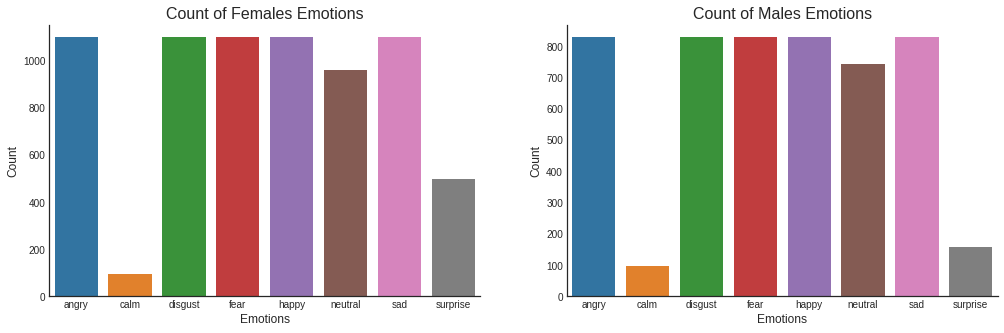

In [11]:
order = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']

fig = plt.figure(figsize=(17, 5))

fig.add_subplot(121)
plt.title('Count of Females Emotions', size=16)
sns.countplot(Females.labels, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

fig.add_subplot(122)
plt.title('Count of Males Emotions', size=16)
sns.countplot(Males.labels, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()

In [12]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

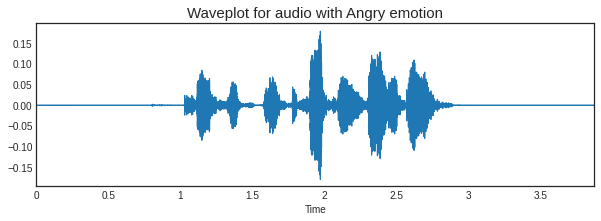

In [13]:
emotion='Angry'
path = '../input/ravdess-emotional-speech-audio/Actor_01/03-01-05-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

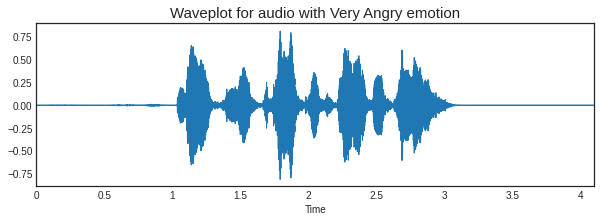

In [14]:
emotion='Very Angry' 
path = '../input/ravdess-emotional-speech-audio/Actor_01/03-01-05-02-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

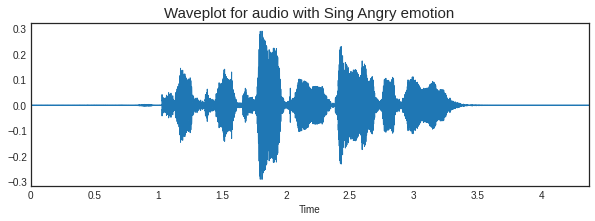

In [15]:
emotion='Sing Angry'
path = '../input/ravdess-emotional-song-audio/Actor_01/03-02-05-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

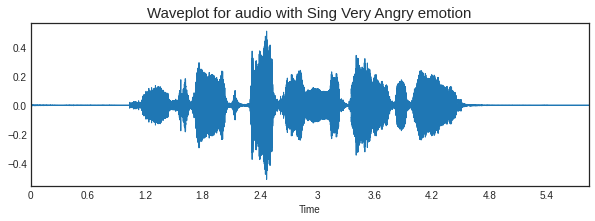

In [16]:
emotion='Sing Very Angry' 
path = '../input/ravdess-emotional-song-audio/Actor_01/03-02-05-02-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

# Data Augmentation

In [17]:
def noise(data):
    noise_amp = 0.04*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.70):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.8):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(data, speed_factor)

def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(data, speed_factor)

path = path = '../input/ravdess-emotional-speech-audio/Actor_01/03-01-05-01-01-01-01.wav'
data, sample_rate = librosa.load(path)

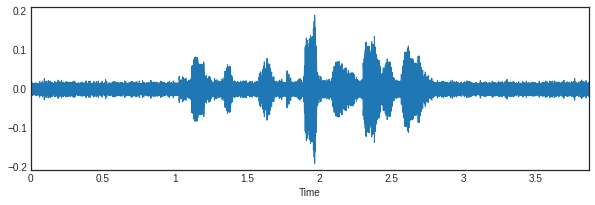

In [18]:
plt.figure(figsize=(10,3))
x = noise(data)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

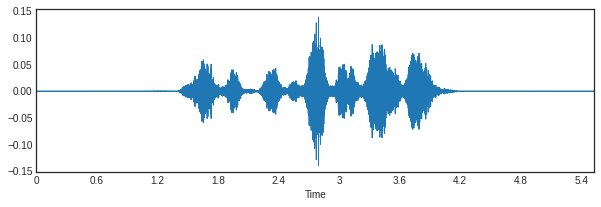

In [19]:
plt.figure(figsize=(10,3))
x = stretch(data)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

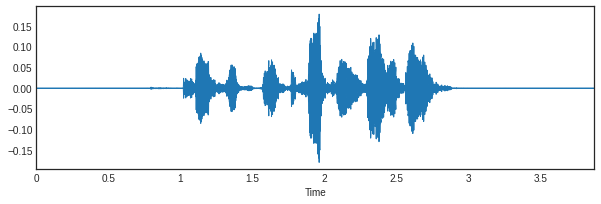

In [20]:
plt.figure(figsize=(10,3))
x = shift(data)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

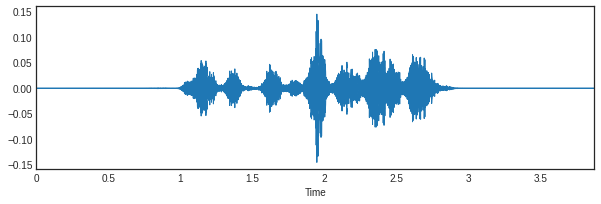

In [21]:
plt.figure(figsize=(10,3))
x = pitch(data, sample_rate)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

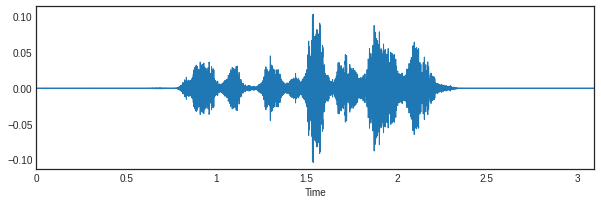

In [22]:
plt.figure(figsize=(10,3))
x = higher_speed(data)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

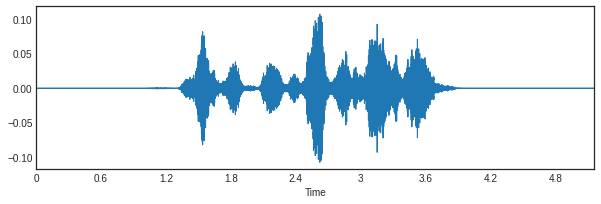

In [23]:
plt.figure(figsize=(10,3))
x = lower_speed(data)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# <center> Feature Extraction</center>

In [24]:
#sample_rate = 22050

def extract_features(data):
    
    result = np.array([])
    
    mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=58)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    result = np.array(mfccs_processed)
     
    return result

def get_features(path):
    data, sample_rate = librosa.load(path, duration=3, offset=0.5, res_type='kaiser_fast') 
    
    res1 = extract_features(data)
    result = np.array(res1)
    
    #noised
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    #stretched
    stretch_data = stretch(data)
    res3 = extract_features(stretch_data)
    result = np.vstack((result, res3))
    
    #shifted
    shift_data = shift(data)
    res4 = extract_features(shift_data)
    result = np.vstack((result, res4))
    
    #pitched
    pitch_data = pitch(data, sample_rate)
    res5 = extract_features(pitch_data)
    result = np.vstack((result, res5)) 
    
    #speed up
    higher_speed_data = higher_speed(data)
    res6 = extract_features(higher_speed_data)
    result = np.vstack((result, res6))
    
    #speed down
    lower_speed_data = higher_speed(data)
    res7 = extract_features(lower_speed_data)
    result = np.vstack((result, res7))
    
    return result

In [25]:
if not DATA_FRAMES:
    
    female_X, female_Y = [], []
    for path, emotion in zip(Females.path, Females.labels):
        features = get_features(path)
        for elem in features: 
            female_X.append(elem)        
            female_Y.append(emotion)
    

    male_X, male_Y = [], []
    for path, emotion in zip(Males.path, Males.labels):
        features = get_features(path)
        for elem in features:
            male_X.append(elem)
            male_Y.append(emotion)
            
    print(f'Check shapes:\nFemale features: {len(female_X)}, labels: {len(female_Y)}\nMale features:   {len(male_X)}, labels: {len(male_Y)}')

In [26]:
def setup_dataframe(gender, features, labels):
    df = pd.DataFrame(features)
    df['labels'] = labels
    df.to_csv(f'{gender}_features.csv', index=False)
    
    print(f'{gender} dataframe')
    df.sample(frac=1).head()
    
    return df

In [27]:
if not DATA_FRAMES:
    Females_Features = setup_dataframe('Female', female_X, female_Y)
else:
    Females_Features = pd.read_csv(fem_path)

In [28]:
if not DATA_FRAMES:
    Males_Features = setup_dataframe('Male', male_X, male_Y)
else:
    Males_Features = pd.read_csv(mal_path)

# <center>Data Preparation

In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [30]:
female_X = Females_Features.iloc[: ,:-1].values
female_Y = Females_Features['labels'].values

male_X = Males_Features.iloc[: ,:-1].values
male_Y = Males_Features['labels'].values

In [31]:
encoder = OneHotEncoder()

female_Y = encoder.fit_transform(np.array(female_Y).reshape(-1,1)).toarray()
male_Y = encoder.fit_transform(np.array(male_Y).reshape(-1,1)).toarray()

## Splitting data

In [32]:
nogender_X = np.concatenate((female_X, male_X))
nogender_Y = np.concatenate((female_Y, male_Y))

x_train, x_test, y_train, y_test = train_test_split(nogender_X, nogender_Y, random_state=0, test_size=0.20, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((68107, 58), (68107, 8), (17027, 58), (17027, 8))

In [33]:
x_trainF, x_testF, y_trainF, y_testF = train_test_split(female_X, female_Y, random_state=0, test_size=0.20, shuffle=True)
x_trainF.shape, y_trainF.shape, x_testF.shape, y_testF.shape

((39379, 58), (39379, 8), (9845, 58), (9845, 8))

In [34]:
x_trainM, x_testM, y_trainM, y_testM = train_test_split(male_X, male_Y, random_state=0, test_size=0.20, shuffle=True)
x_trainM.shape, y_trainM.shape, x_testM.shape, y_testM.shape

((28728, 58), (28728, 8), (7182, 58), (7182, 8))

* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  
We are going to scale our features throught the StandarScaler module, it standardize the features in a **Normal curve**, i.e.:<br><br>
  <center> $Z = (X -{\mu})/{\sigma}$. </center><br>
*Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).*

In [35]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_trainF = scaler.fit_transform(x_trainF)
x_testF = scaler.transform(x_testF)

x_trainM = scaler.fit_transform(x_trainM)
x_testM = scaler.transform(x_testM)

## Making our data compatible to model

In [36]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape , x_test.shape , y_test.shape

((68107, 58, 1), (68107, 8), (17027, 58, 1), (17027, 8))

In [37]:
x_trainF = np.expand_dims(x_trainF, axis=2)
x_testF = np.expand_dims(x_testF, axis=2)
x_trainF.shape, y_trainF.shape, x_testF.shape, y_testF.shape

((39379, 58, 1), (39379, 8), (9845, 58, 1), (9845, 8))

In [38]:
x_trainM = np.expand_dims(x_trainM, axis=2)
x_testM = np.expand_dims(x_testM, axis=2)
x_trainM.shape, y_trainM.shape, x_testM.shape, y_testM.shape

((28728, 58, 1), (28728, 8), (7182, 58, 1), (7182, 8))

# <center>Modeling<center>

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

In [40]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [41]:
# Create a MirroredStrategy.
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

Number of devices: 1


In [42]:
with strategy.scope():
    
    def build_model(in_shape):
        
        model=Sequential()
        model.add(Conv1D(256, kernel_size=6, strides=1, padding='same', activation='relu', input_shape=(in_shape, 1)))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))
        model.add(Dropout(0.2))

        model.add(Conv1D(64, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(MaxPooling1D(pool_size=4, strides = 2, padding = 'same'))
        
        model.add(Flatten())
        model.add(Dense(units=32, activation='relu'))
        model.add(Dropout(0.3))

        model.add(Dense(units=8, activation='softmax'))
        model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
          
        
        return model

In [43]:
def model_build_summary(mod_dim, tr_features, val_features, val_labels):
    model = build_model(mod_dim)
    model.summary()
    
    score = model.evaluate(val_features, val_labels, verbose = 1)
    accuracy = 100*score[1]
    
    return model

*ReduceLROnPlateau* reduce learning rate when a metric has stopped improving.<br>

Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

In [44]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=4, min_lr=0.000001)

batch_size = 32
n_epochs = 75

In [45]:
def show_graphs(history):
    epochs = [i for i in range(n_epochs)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(30,12)
    ax[0].plot(epochs , train_loss , label = 'Training Loss')
    ax[0].plot(epochs , test_loss , label = 'Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")

    ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
    ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    plt.show()

## Model Summary and Pre-training Accuracy

In [46]:
total_model = model_build_summary(x_train.shape[1], x_train, x_test, y_test)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 58, 256)           1792      
_________________________________________________________________
average_pooling1d (AveragePo (None, 29, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 29, 128)           196736    
_________________________________________________________________
average_pooling1d_1 (Average (None, 15, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 15, 128)           98432     
_________________________________________________________________
average_pooling1d_2 (Average (None, 8, 128)            0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 128)            0

In [47]:
female_model = model_build_summary(x_trainF.shape[1], x_trainF, x_testF, y_testF)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 58, 256)           1792      
_________________________________________________________________
average_pooling1d_3 (Average (None, 29, 256)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 29, 128)           196736    
_________________________________________________________________
average_pooling1d_4 (Average (None, 15, 128)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 15, 128)           98432     
_________________________________________________________________
average_pooling1d_5 (Average (None, 8, 128)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 128)           

In [48]:
male_model = model_build_summary(x_trainM.shape[1], x_trainM, x_testM, y_testM)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 58, 256)           1792      
_________________________________________________________________
average_pooling1d_6 (Average (None, 29, 256)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 29, 128)           196736    
_________________________________________________________________
average_pooling1d_7 (Average (None, 15, 128)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 15, 128)           98432     
_________________________________________________________________
average_pooling1d_8 (Average (None, 8, 128)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 128)           

## Model training

In [49]:
history = total_model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/75
2129/2129 [==============================] - 9s 4ms/step - loss: 1.4392 - accuracy: 0.4260 - val_loss: 1.1743 - val_accuracy: 0.5302
Epoch 2/75
2129/2129 [==============================] - 9s 4ms/step - loss: 1.2039 - accuracy: 0.5193 - val_loss: 1.1348 - val_accuracy: 0.5487
Epoch 3/75
2129/2129 [==============================] - 9s 4ms/step - loss: 1.1276 - accuracy: 0.5545 - val_loss: 1.0634 - val_accuracy: 0.5740
Epoch 4/75
2129/2129 [==============================] - 9s 4ms/step - loss: 1.0790 - accuracy: 0.5740 - val_loss: 1.0203 - val_accuracy: 0.5939
Epoch 5/75
2129/2129 [==============================] - 9s 4ms/step - loss: 1.0294 - accuracy: 0.5949 - val_loss: 0.9588 - val_accuracy: 0.6209
Epoch 6/75
2129/2129 [==============================] - 9s 4ms/step - loss: 0.9849 - accuracy: 0.6128 - val_loss: 0.9234 - val_accuracy: 0.6376
Epoch 7/75
2129/2129 [==============================] - 9s 4ms/step - loss: 0.9468 - accuracy: 0.6308 - val_loss: 0.8875 - val_accuracy:

In [50]:
female_history = female_model.fit(x_trainF, y_trainF, batch_size=batch_size, epochs=n_epochs, validation_data=(x_testF, y_testF), callbacks=[rlrp])

Epoch 1/75
1231/1231 [==============================] - 5s 4ms/step - loss: 1.2251 - accuracy: 0.5200 - val_loss: 0.8919 - val_accuracy: 0.6417
Epoch 2/75
1231/1231 [==============================] - 5s 4ms/step - loss: 0.9286 - accuracy: 0.6295 - val_loss: 0.8021 - val_accuracy: 0.6750
Epoch 3/75
1231/1231 [==============================] - 5s 4ms/step - loss: 0.8426 - accuracy: 0.6650 - val_loss: 0.7785 - val_accuracy: 0.6916
Epoch 4/75
1231/1231 [==============================] - 5s 4ms/step - loss: 0.7836 - accuracy: 0.6876 - val_loss: 0.7167 - val_accuracy: 0.7132
Epoch 5/75
1231/1231 [==============================] - 5s 4ms/step - loss: 0.7365 - accuracy: 0.7063 - val_loss: 0.6626 - val_accuracy: 0.7429
Epoch 6/75
1231/1231 [==============================] - 5s 4ms/step - loss: 0.6914 - accuracy: 0.7249 - val_loss: 0.5979 - val_accuracy: 0.7641
Epoch 7/75
1231/1231 [==============================] - 5s 4ms/step - loss: 0.6522 - accuracy: 0.7449 - val_loss: 0.5904 - val_accuracy:

In [51]:
male_history = male_model.fit(x_trainM, y_trainM, batch_size=batch_size, epochs=n_epochs, validation_data=(x_testM, y_testM), callbacks=[rlrp])

Epoch 1/75
898/898 [==============================] - 4s 4ms/step - loss: 1.6862 - accuracy: 0.3200 - val_loss: 1.4815 - val_accuracy: 0.3959
Epoch 2/75
898/898 [==============================] - 4s 4ms/step - loss: 1.5077 - accuracy: 0.3928 - val_loss: 1.4080 - val_accuracy: 0.4575
Epoch 3/75
898/898 [==============================] - 4s 4ms/step - loss: 1.4121 - accuracy: 0.4418 - val_loss: 1.3130 - val_accuracy: 0.4818
Epoch 4/75
898/898 [==============================] - 4s 4ms/step - loss: 1.3407 - accuracy: 0.4702 - val_loss: 1.2571 - val_accuracy: 0.5167
Epoch 5/75
898/898 [==============================] - 4s 4ms/step - loss: 1.2857 - accuracy: 0.4961 - val_loss: 1.1752 - val_accuracy: 0.5434
Epoch 6/75
898/898 [==============================] - 4s 4ms/step - loss: 1.2222 - accuracy: 0.5212 - val_loss: 1.1122 - val_accuracy: 0.5742
Epoch 7/75
898/898 [==============================] - 4s 4ms/step - loss: 1.1658 - accuracy: 0.5445 - val_loss: 1.0740 - val_accuracy: 0.5847
Epoch 

**Uncomment the code below to see the output of a specific layer

In [52]:
'''
from keras import backend as K

layer_name = 'conv1d_11'
intermediate_layer_model = keras.Model(inputs=female_model.input,
                                       outputs=female_model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model(x_testF)
print(intermediate_output[1,0])
'''

"\nfrom keras import backend as K\n\nlayer_name = 'conv1d_11'\nintermediate_layer_model = keras.Model(inputs=female_model.input,\n                                       outputs=female_model.get_layer(layer_name).output)\nintermediate_output = intermediate_layer_model(x_testF)\nprint(intermediate_output[1,0])\n"

## Performance Evaluations

In [53]:
# genderless
score = total_model.evaluate(x_train,y_train, verbose = 0)
print("Mixed-gender emotions training Accuracy: {0:.2%}".format(score[1]))

score = total_model.evaluate(x_test, y_test, verbose=0)
print("Mixed-gender emotions testing Accuracy: {0:.2%}".format(score[1]))

Mixed-gender emotions training Accuracy: 96.80%
Mixed-gender emotions testing Accuracy: 88.07%


In [54]:
score = female_model.evaluate(x_trainF,y_trainF, verbose = 0)
print("Female emotions training Accuracy: {0:.2%}".format(score[1]))

score = female_model.evaluate(x_testF, y_testF, verbose=0)
print("Female emotions testing Accuracy: {0:.2%}".format(score[1]))

Female emotions training Accuracy: 99.38%
Female emotions testing Accuracy: 93.54%


In [55]:
score = male_model.evaluate(x_trainM,y_trainM, verbose = 0)
print("Male emotions training Accuracy: {0:.2%}".format(score[1]))

score = male_model.evaluate(x_testM, y_testM, verbose=0)
print("Male emotions testing Accuracy: {0:.2%}".format(score[1]))

Male emotions training Accuracy: 99.47%
Male emotions testing Accuracy: 88.92%


## Training and Validation trends

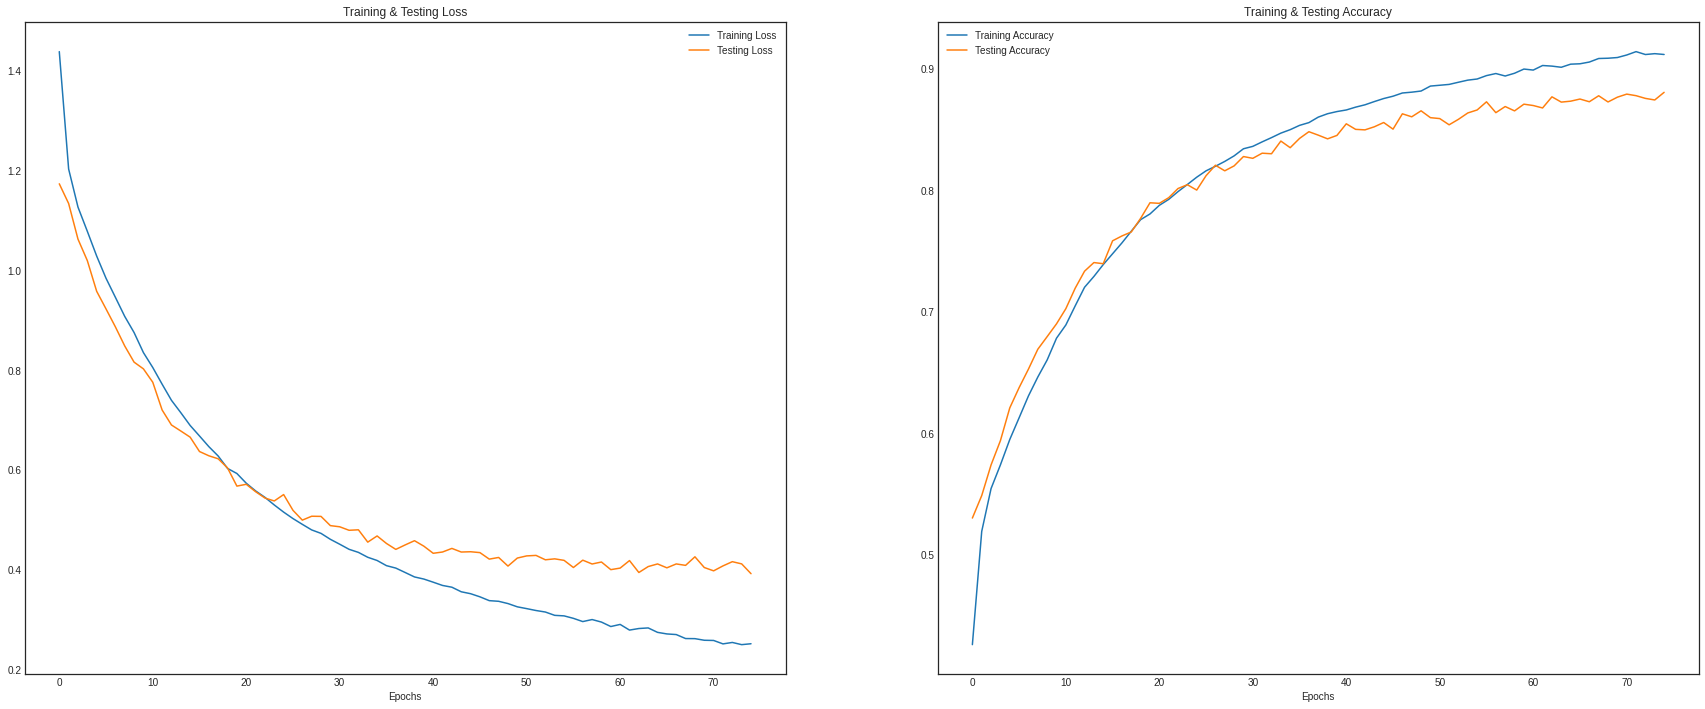

In [56]:
show_graphs(history)

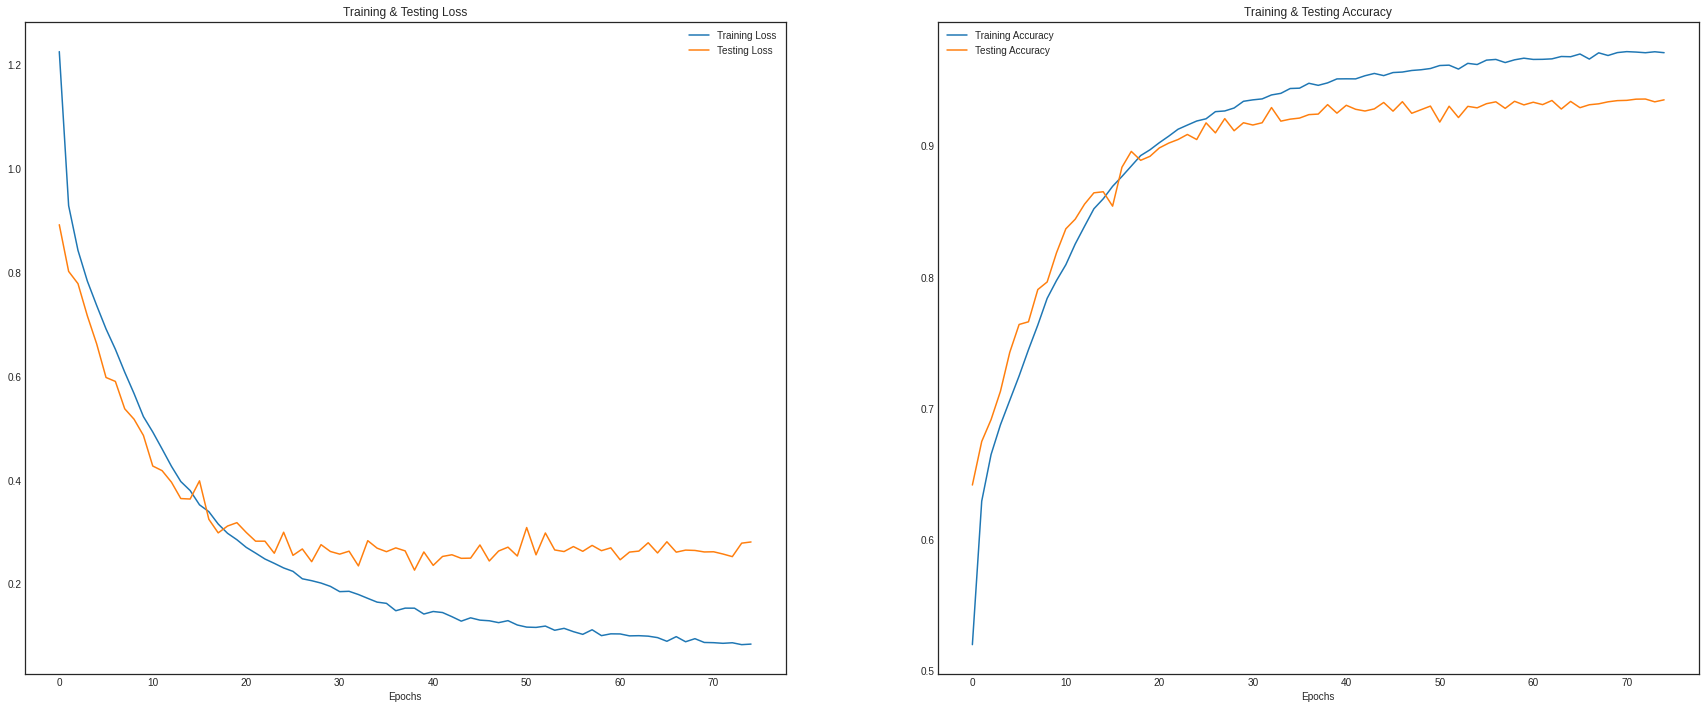

In [57]:
show_graphs(female_history)

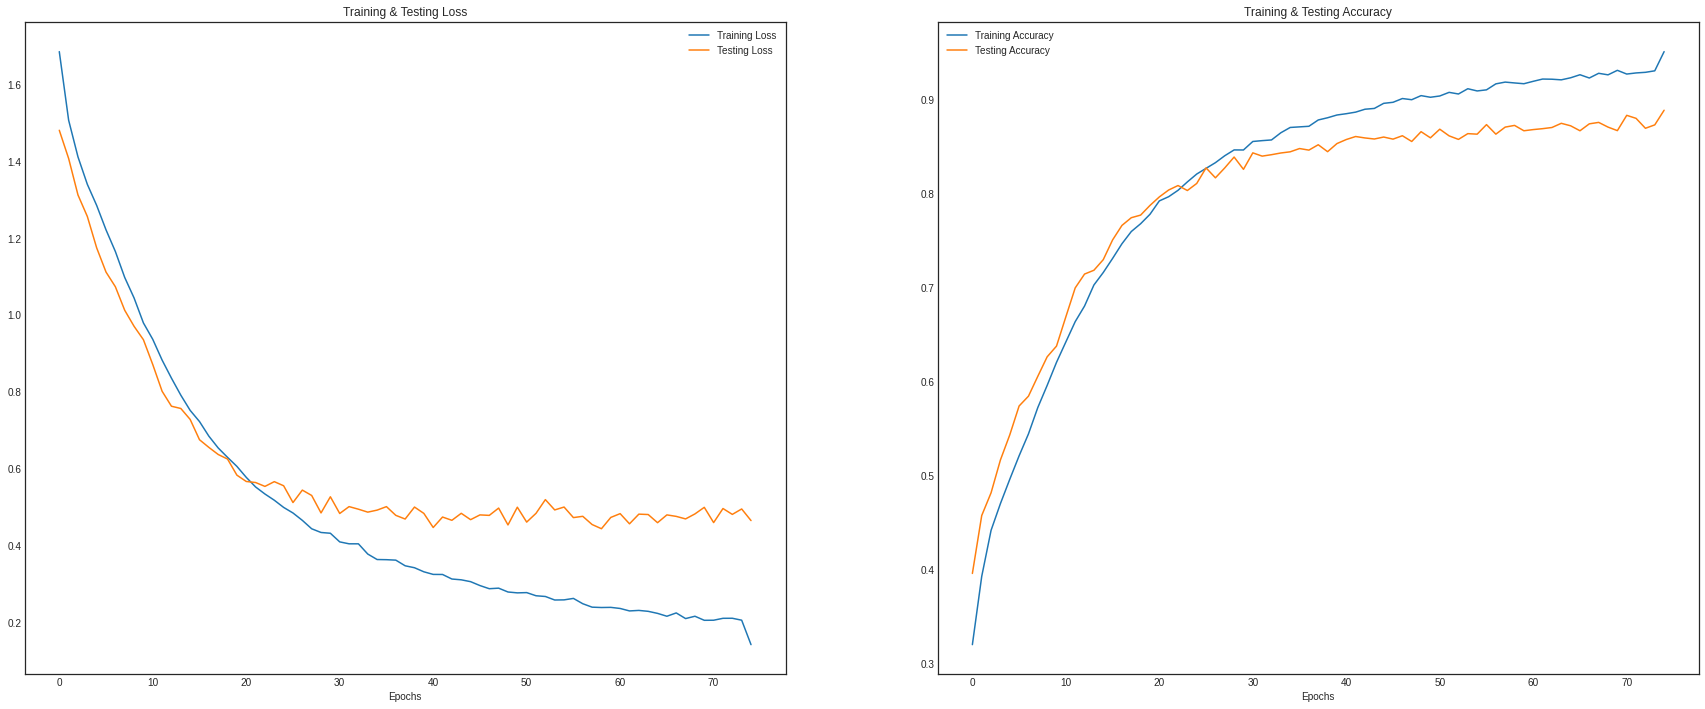

In [58]:
show_graphs(male_history)

## Confusion matrix

In [59]:
pred_test = female_model.predict(x_testF)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_testF)

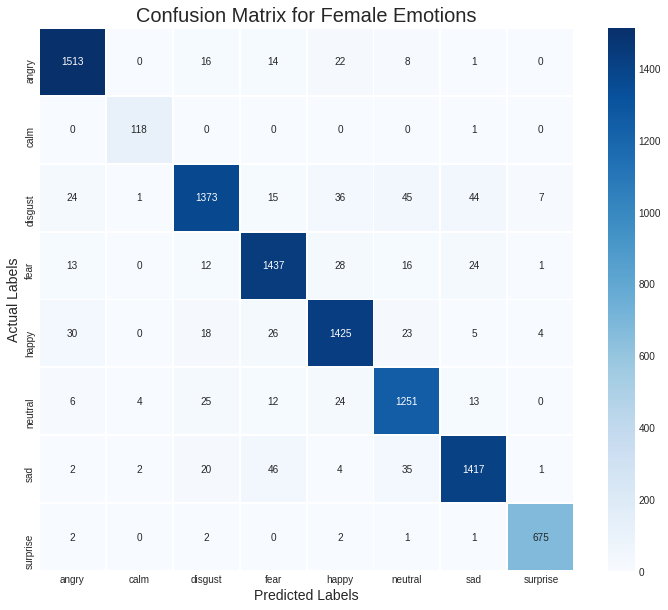

In [60]:
cm = confusion_matrix(y_test_, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Female Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [61]:
pred_test = male_model.predict(x_testM)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_testM)

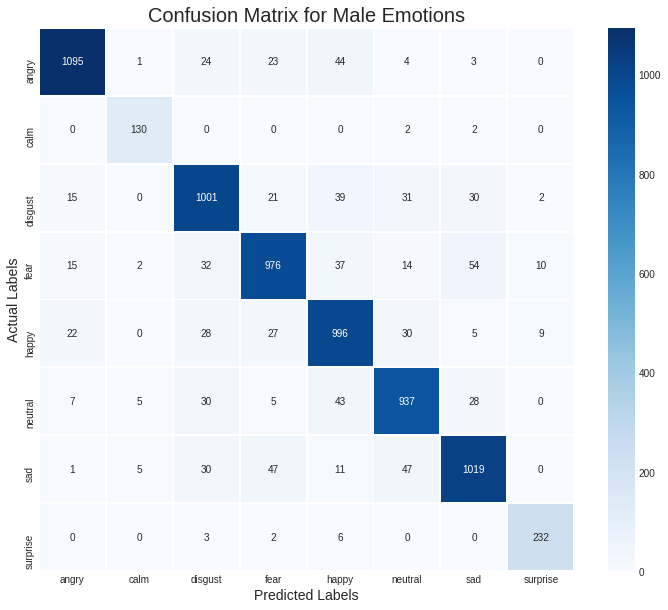

In [62]:
cm = confusion_matrix(y_test_, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Male Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()